In [1]:
                  ''' House Price Prediction Using Tensorflow implementing the Convolutional Neural Network'''

' House Price Prediction Using Tensorflow implementing the Convolutional Neural Network'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#from utils import *

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

print('Libraries imported.')


Libraries imported.


In [3]:
'''For this project, we are going to work on evaluating price of houses given the following features:

Year of sale of the house
The age of the house at the time of sale
Distance from city center
Number of stores in the locality
The latitude
The longitude'''

'For this project, we are going to work on evaluating price of houses given the following features:\n\nYear of sale of the house\nThe age of the house at the time of sale\nDistance from city center\nNumber of stores in the locality\nThe latitude\nThe longitude'

In [4]:
#Hereby we define the column names 
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
df = pd.read_csv('data_new.csv', names = column_names)

In [5]:
#Viewing the First five rows of the data
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [6]:
#Viewing the Last five rows of the data
df.tail()

,serial,date,age,distance,stores,latitude,longitude,price
4995,4995,2007,17,6,3,90,125,13539
4996,4996,2016,7,10,0,85,129,14757
4997,4997,2017,6,10,5,90,125,14102
4998,4998,2010,37,3,5,81,128,14313
4999,4999,2018,9,1,9,90,127,12770


In [7]:
#Viewing the Shape of the Data 
df.shape

(5000, 8)

In [8]:
#Datatypes of the Column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   serial     5000 non-null   int64
 1   date       5000 non-null   int64
 2   age        5000 non-null   int64
 3   distance   5000 non-null   int64
 4   stores     5000 non-null   int64
 5   latitude   5000 non-null   int64
 6   longitude  5000 non-null   int64
 7   price      5000 non-null   int64
dtypes: int64(8)
memory usage: 312.6 KB


In [9]:
#Finding the null values 
df.isnull().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [10]:
df.describe()

,serial,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2499.500000,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,1443.520003,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,0.000000,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,1249.750000,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2499.500000,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,3749.250000,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,4999.000000,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000


In [11]:
'''
3: Data Normalization
3.1: Data Normalization
We can make it easier for optimization algorithms to find minimas by normalizing the data before training a model.'''

'\n3: Data Normalization\n3.1: Data Normalization\nWe can make it easier for optimization algorithms to find minimas by normalizing the data before training a model.'

In [12]:
df = df.iloc[:, 1:]
df_norm = (df - df.mean())/df.std()

In [13]:
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [ ]:
#3.2: Convert Label Value
'''Because we are using normalized values for the labels, we will get the predictions back from a trained model in the same distribution. 
So, we need to convert the predicted values back to the original distribution if we want predicted prices.

In [15]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value (y_pred):
    return int((y_pred*y_mean)/y_std)

In [ ]:
'''
4: Create Training and Test Sets
4.1: Select Features
Make sure to remove the column price from the list of features as it is the label and should not be used as a feature.
'''

In [16]:
#The Training DataSet
train_df = df_norm.iloc[: , :5]
train_df.head()

,date,age,distance,stores,latitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301
2,1.298598,-0.083410,-0.618094,0.663402,1.590328
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238
4,0.932135,0.534444,0.006938,0.981581,-1.255981


In [17]:
#4.2: Select Labels
test_df = df_norm.iloc[: ,-1]
pd.DataFrame(test_df.head())

,price
0,0.350088
1,-1.836486
2,-0.339584
3,-1.839425
4,0.245266


In [ ]:
'''4.3: Feature and Label Values
We will need to extract just the numeric values for the features and labels as the TensorFlow model will expect just numeric values as input.

In [19]:
x_arr = train_df.values
y_arr = test_df.values

print('features array :',x_arr)
print('label array : ',y_arr)

features array : [[ 0.01597778  0.18138426  1.25700164  0.34522379 -0.30721158]
 [-0.35048517 -1.31911814 -0.93060999 -0.60931203  0.32530146]
 [ 1.29859812 -0.08341028 -0.61809404  0.66340239  1.59032754]
 ...
 [ 1.4818296  -1.14258845  1.56951759  0.02704518  1.59032754]
 [ 0.19920926  1.59362182 -0.61809404  0.02704518 -1.25598114]
 [ 1.66506107 -0.87779391 -1.24312594  1.2997596   1.59032754]]
label array :  [ 0.35008836 -1.83648583 -0.33958379 ...  0.19138539  0.39809111
 -1.11350566]


In [ ]:
'''4.4: Train and Test Split
We will keep some part of the data aside as a test set. The model will not use this set during training and it will be used only for checking 
the performance of the model in trained and un-trained states. This way, we can make sure that we are going in the right direction with our 
model training.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_arr,y_arr, test_size=0.05, random_state=0)

print('train shape', x_train.shape, y_train.shape)
print('test shape', x_test.shape, y_test.shape)

train shape (4750, 5) (4750,)
test shape (250, 5) (250,)


In [23]:
#5: Create the Model

model=Sequential([Dense(10, input_shape=(5,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)])
model.compile(
        loss = 'mse',
        optimizer = 'adam'
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 20)                220       
                                                                 
 dense_6 (Dense)             (None, 5)                 105       
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 391 (1.53 KB)
Trainable params: 391 (1.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
'''6: Model Training
6.1: Model Training
We can use an EarlyStopping callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs.

In [35]:
#es_cb = EarlyStopping(monitor='val_loss', patience=5)
preds_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 50,
    #callbacks = [es_cb]
    
)

8/8 [==============================] - 0s 2ms/step
Epoch 1/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1514
Epoch 2/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1484 - val_loss: 0.1476
Epoch 3/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1480 - val_loss: 0.1484
Epoch 4/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1465
Epoch 5/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1486 - val_loss: 0.1501
Epoch 6/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1485 - val_loss: 0.1521
Epoch 7/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1488 - val_loss: 0.1507
Epoch 8/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1479 - val_loss: 0.1496
Epoch 9/50
149/149 [==============================] - 0s 2ms/step - loss: 0.1480 - val_loss: 0.1520
Epoch 10/50
149/149 [============================

In [36]:
scores1=model.evaluate(x_train)

149/149 [==============================] - 0s 1ms/step - loss: 0.0000e+00


In [37]:
scores2=model.evaluate(x_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.0000e+00


In [38]:
scores3=model.evaluate(y_train)

149/149 [==============================] - 0s 1ms/step - loss: 0.0000e+00


In [39]:
scores4=model.evaluate(y_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0000e+00


In [ ]:
#6.2: Plot Training and Validation Loss
#Let's create the plot_loss helper function to take a look training and validation loss.

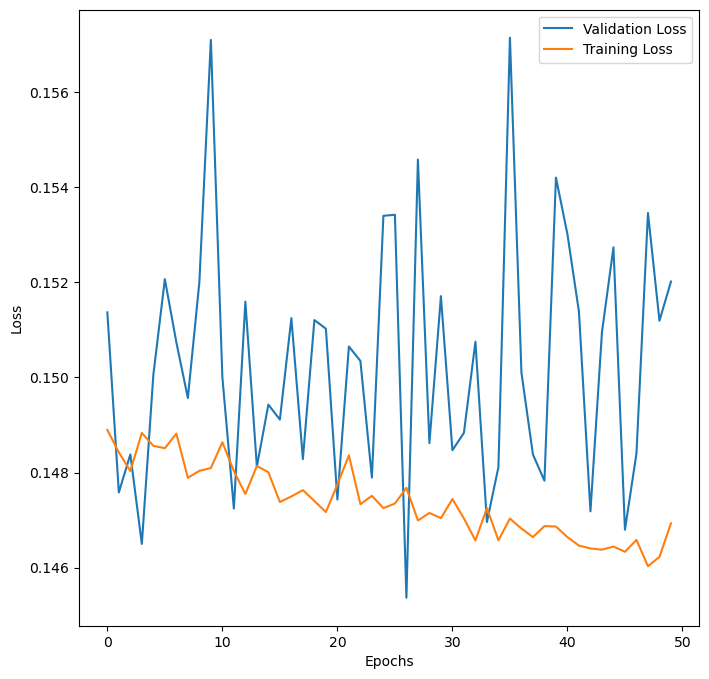

In [40]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

plot_loss(history)

In [ ]:
#7: Predictions
#7.1: Plot Raw Predictions
#Let's create the compare_predictions helper function to compare predictions from the model when it was untrained and when it was trained.

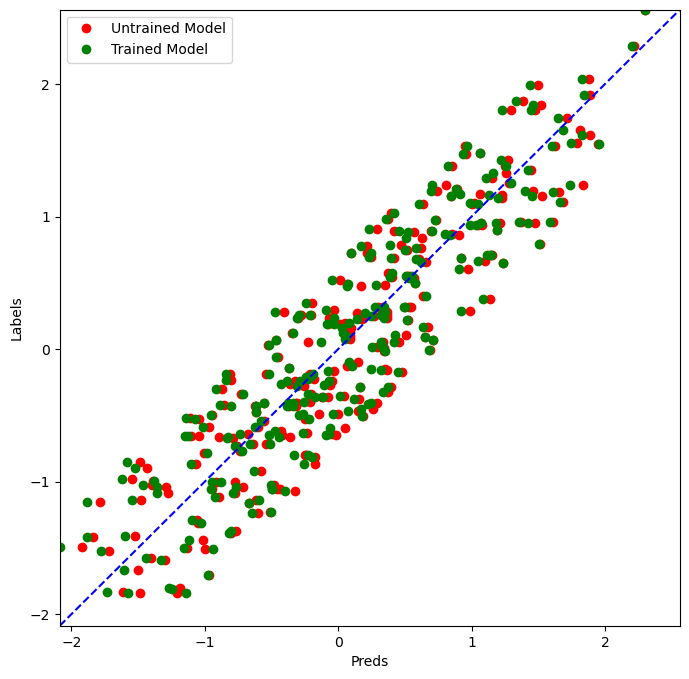

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming preds_on_untrained and preds_on_trained are multidimensional arrays, flatten them
preds_on_untrained_flat = np.ravel(preds_on_untrained)
preds_on_trained_flat = np.ravel(preds_on_trained)

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

compare_predictions(preds_on_untrained_flat, preds_on_trained_flat, y_test)


In [ ]:
#7.2: Plot Price Predictions
#The plot for price predictions and raw predictions will look the same with just one difference: The x and y axis scale is changed.

C:\Users\KIIT\AppData\Local\Temp\ipykernel_8336\3213956057.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int((y_pred*y_mean)/y_std)


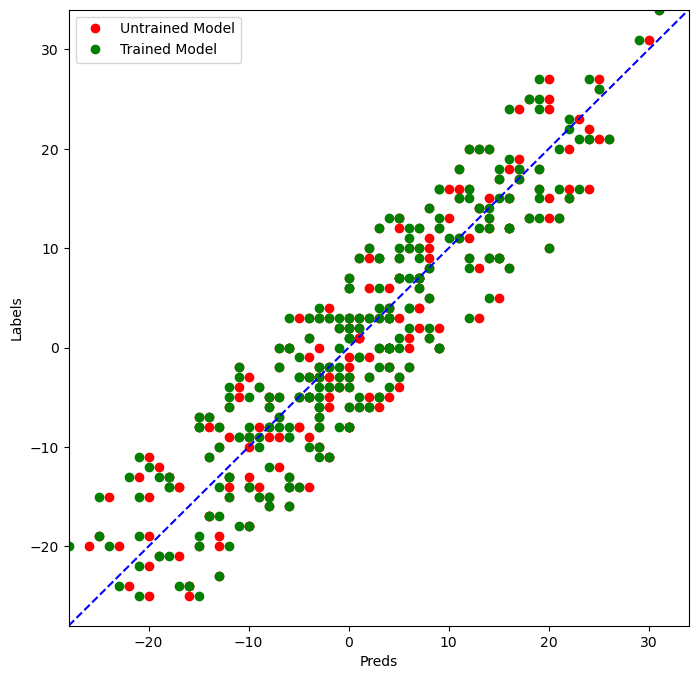

In [42]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]
prince_test = [convert_label_value(y) for y in y_test]

def compare_predictions(preds1, preds2, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot(preds1, y_test, 'ro', label='Untrained Model')
    plt.plot(preds2, y_test, 'go', label='Trained Model')
    plt.xlabel('Preds')
    plt.ylabel('Labels')
    
    y_min = min(min(y_test), min(preds1), min(preds2))
    y_max = max(max(y_test), max(preds1), max(preds2))
    
    plt.xlim([y_min, y_max])
    plt.ylim([y_min, y_max])
    plt.plot([y_min, y_max], [y_min, y_max], 'b--')
    plt.legend()
    plt.show()
    return

compare_predictions(price_untrained, price_trained, prince_test)